In [1]:
import pandas as pd 
import numpy as np
import os
import glob
import matplotlib.pyplot as plt 
%matplotlib inline
import matplotlib.image as mpimg

from PIL import Image 
import tensorflow as tf
from tensorflow import keras 
from keras.models import Sequential
from tensorflow.keras import regularizers
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test/PNEUMONIA/SARS-10.1148rg.242035193-g04mr34g04b-Fig4b-day12.jpeg
/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test/PNEUMONIA/ryct.2020200034.fig5-day4.jpeg
/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test/PNEUMONIA/SARS-10.1148rg.242035193-g04mr34g0-Fig8b-day5.jpeg
/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test/PNEUMONIA/ryct.2020200034.fig5-day0.jpeg
/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test/PNEUMONIA/SARS-10.1148rg.242035193-g04mr34g09a-Fig9a-day17.jpeg
/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test/PNEUMONIA/ryct.2020200034.fig2.jpeg
/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test/PNEUMONIA/streptococcus-pneumoniae-pneumonia-temporal-evolution-1-day3.jpg
/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test/PN

In [2]:
''' dataset path '''
dataset_path = '../input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19'

In [3]:
''' train and test path '''
train_path = '../input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/train'
test_path = '../input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test'

In [4]:
''' ImageDataGenerator '''

''' data augmentation '''
train_ds = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
test_ds = ImageDataGenerator(rescale = 1./255)

train_ds = train_datagen.flow_from_directory(train_path, target_size = (200,200), batch_size = 10, class_mode = 'binary',
                                         color_mode = 'grayscale')

test+ds = test_datagen.flow_from_directory(test_path, target_size = (200,200), batch_size = 10, class_mode = 'binary',
                                           color_mode = 'grayscale')

Found 148 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [5]:
''' Model '''

''' container '''
model = Sequential()

''' Convolutional layers '''
model.add(Convolution2D(32, (3, 3), input_shape = (200, 200, 1), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Convolution2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Convolution2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Convolution2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())

''' Hidden Layer '''
model.add(Dense(128, activation = 'relu'))

''' Classification Layer '''
model.add(Dense(1, activation = 'sigmoid'))

In [6]:
''' Compile the model '''
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [7]:
''' training '''
history = model.fit(training_set, epochs = 10, validation_data= test_set)

Epoch 1/10
15/15 [==============================] - 8s 530ms/step - loss: 0.6917 - accuracy: 0.5270 - val_loss: 0.6694 - val_accuracy: 0.5000
Epoch 2/10
15/15 [==============================] - 5s 349ms/step - loss: 0.6619 - accuracy: 0.5811 - val_loss: 0.6685 - val_accuracy: 0.5000
Epoch 3/10
15/15 [==============================] - 5s 367ms/step - loss: 0.4526 - accuracy: 0.7500 - val_loss: 0.1938 - val_accuracy: 0.9250
Epoch 4/10
15/15 [==============================] - 5s 339ms/step - loss: 0.3166 - accuracy: 0.8851 - val_loss: 0.1075 - val_accuracy: 0.9500
Epoch 5/10
15/15 [==============================] - 6s 373ms/step - loss: 0.2433 - accuracy: 0.8986 - val_loss: 0.1391 - val_accuracy: 0.9250
Epoch 6/10
15/15 [==============================] - 5s 337ms/step - loss: 0.2614 - accuracy: 0.8986 - val_loss: 0.1183 - val_accuracy: 0.9250
Epoch 7/10
15/15 [==============================] - 5s 351ms/step - loss: 0.1826 - accuracy: 0.9122 - val_loss: 0.0694 - val_accuracy: 1.0000
Epoch 

In [8]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

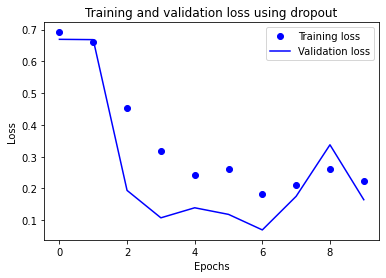

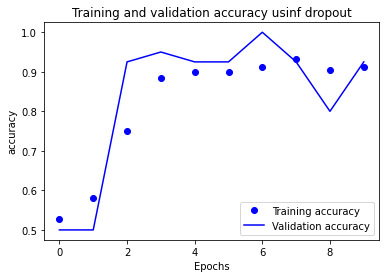

In [9]:
''' training loss and validation loss graph '''
train_loss = history_dict['loss']
val_loss = history_dict['val_loss']
plt.plot(train_loss, 'bo', label='Training loss')
plt.plot(val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss using dropout')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

''' training accuracy and validation accuracy '''
train_acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
plt.plot(train_acc, 'bo', label='Training accuracy')
plt.plot(val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy usinf dropout')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [10]:
''' Model1 '''

''' container '''
model1 = Sequential()

''' Convolutional Layers '''
model1.add(Convolution2D(32, (3, 3), input_shape = (200, 200, 1), activation = 'relu'))
model1.add(MaxPooling2D(pool_size = (2, 2)))

model1.add(Convolution2D(32, (3, 3), activation = 'relu'))
model1.add(MaxPooling2D(pool_size = (2, 2)))

model1.add(Convolution2D(32, (3, 3), activation = 'relu'))
model1.add(MaxPooling2D(pool_size = (2, 2)))

model1.add(Convolution2D(64, (3, 3), activation = 'relu'))
model1.add(MaxPooling2D(pool_size = (2, 2)))

model1.add(Flatten())

''' Hidden Layer '''
model1.add(Dense(128, activation = 'relu'))

''' Classification Layer '''
model1.add(Dense(1, activation = 'sigmoid'))

In [11]:
''' compile the model '''
model1.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [12]:
''' training '''
history1 = model1.fit(training_set, epochs = 10, validation_data= test_set)

Epoch 1/10
15/15 [==============================] - 6s 401ms/step - loss: 0.7144 - accuracy: 0.4459 - val_loss: 0.6767 - val_accuracy: 0.5250
Epoch 2/10
15/15 [==============================] - 5s 360ms/step - loss: 0.6665 - accuracy: 0.6284 - val_loss: 0.5682 - val_accuracy: 0.7500
Epoch 3/10
15/15 [==============================] - 5s 335ms/step - loss: 0.5820 - accuracy: 0.7365 - val_loss: 0.3481 - val_accuracy: 0.9250
Epoch 4/10
15/15 [==============================] - 5s 355ms/step - loss: 0.3669 - accuracy: 0.8243 - val_loss: 0.1192 - val_accuracy: 0.9750
Epoch 5/10
15/15 [==============================] - 5s 326ms/step - loss: 0.2881 - accuracy: 0.8919 - val_loss: 0.0907 - val_accuracy: 0.9750
Epoch 6/10
15/15 [==============================] - 5s 344ms/step - loss: 0.1901 - accuracy: 0.9459 - val_loss: 0.0723 - val_accuracy: 0.9750
Epoch 7/10
15/15 [==============================] - 6s 375ms/step - loss: 0.2549 - accuracy: 0.8919 - val_loss: 0.1378 - val_accuracy: 0.9750
Epoch 

In [13]:
hist_dict1 = history1.history
hist_dict1.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

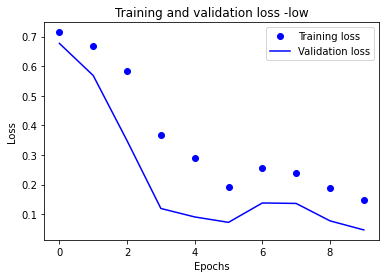

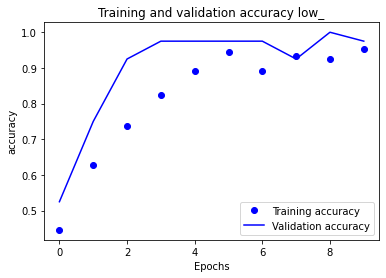

In [14]:
''' training loss and validation loss graph '''
train_loss = hist_dict1['loss']
val_loss = hist_dict1['val_loss']
plt.plot(train_loss, 'bo', label='Training loss')
plt.plot(val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss -low')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

''' training accuracy and validation accuracy graph '''
train_acc = hist_dict1['accuracy']
val_acc = hist_dict1['val_accuracy']
plt.plot(train_acc, 'bo', label='Training accuracy')
plt.plot(val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy low_')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [15]:
''' Model2 '''

''' container '''
model2 = Sequential()

''' Convolutional Layers '''
model2.add(Convolution2D(32, (3, 3), input_shape = (200, 200, 1), activation = 'relu'))
model2.add(MaxPooling2D(pool_size = (2, 2)))
model2.add(Dropout(0.2))

model2.add(Convolution2D(32, (3, 3), activation = 'relu'))
model2.add(MaxPooling2D(pool_size = (2, 2)))

model2.add(Convolution2D(64, (3, 3), activation = 'relu'))
model2.add(MaxPooling2D(pool_size = (2, 2)))
model2.add(Dropout(0.2))

model2.add(Convolution2D(64, (3, 3), activation = 'relu'))
model2.add(MaxPooling2D(pool_size = (2, 2)))

model2.add(Flatten())

''' Hidden Layer '''
model2.add(Dense(128, activation = 'relu'))
model2.add(Dropout(0.2))

''' Classification Layer '''
model2.add(Dense(1, activation = 'sigmoid'))

In [16]:
''' compile the model '''
model2.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [17]:
''' training '''
history2 = model2.fit(training_set, epochs = 10, validation_data= test_set)

Epoch 1/10
15/15 [==============================] - 5s 344ms/step - loss: 0.6988 - accuracy: 0.5000 - val_loss: 0.6762 - val_accuracy: 0.9500
Epoch 2/10
15/15 [==============================] - 6s 383ms/step - loss: 0.5715 - accuracy: 0.7365 - val_loss: 0.4981 - val_accuracy: 0.6500
Epoch 3/10
15/15 [==============================] - 5s 337ms/step - loss: 0.5099 - accuracy: 0.7703 - val_loss: 0.4566 - val_accuracy: 0.7250
Epoch 4/10
15/15 [==============================] - 5s 353ms/step - loss: 0.4164 - accuracy: 0.8378 - val_loss: 0.3444 - val_accuracy: 0.8750
Epoch 5/10
15/15 [==============================] - 5s 331ms/step - loss: 0.3035 - accuracy: 0.8784 - val_loss: 0.2072 - val_accuracy: 0.9250
Epoch 6/10
15/15 [==============================] - 5s 363ms/step - loss: 0.2464 - accuracy: 0.8716 - val_loss: 0.1667 - val_accuracy: 0.9750
Epoch 7/10
15/15 [==============================] - 5s 326ms/step - loss: 0.2216 - accuracy: 0.9189 - val_loss: 0.1542 - val_accuracy: 0.9500
Epoch 

In [18]:
hist_dict2 = history2.history
hist_dict2.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

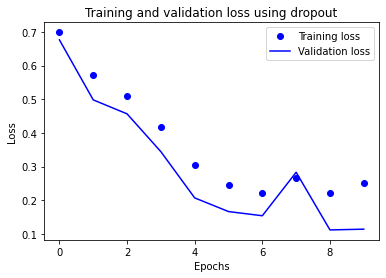

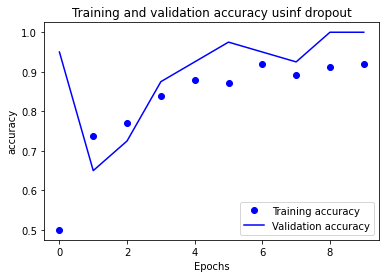

In [19]:
''' training loss and validation loss graph '''
train_loss = hist_dict2['loss']
val_loss = hist_dict2['val_loss']
plt.plot(train_loss, 'bo', label='Training loss')
plt.plot(val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss using dropout')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

''' training accuracy and validation accuracy graph '''
train_acc = hist_dict2['accuracy']
val_acc = hist_dict2['val_accuracy']
plt.plot(train_acc, 'bo', label='Training accuracy')
plt.plot(val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy usinf dropout')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [20]:
''' Model3 '''

''' container '''
model3 = Sequential()

''' Convolutional Layers '''
model3.add(Convolution2D(32, (3, 3),kernel_regularizer=regularizers.l1(0.001),input_shape = (200, 200, 1), activation = 'relu'))
model3.add(MaxPooling2D(pool_size = (2, 2)))

model3.add(Convolution2D(32, (3, 3),kernel_regularizer=regularizers.l1(0.001), activation = 'relu'))
model3.add(MaxPooling2D(pool_size = (2, 2)))

model3.add(Convolution2D(64, (3, 3),kernel_regularizer=regularizers.l1(0.001), activation = 'relu'))
model3.add(MaxPooling2D(pool_size = (2, 2)))

model3.add(Convolution2D(64, (3, 3),kernel_regularizer=regularizers.l1(0.001), activation = 'relu'))
model3.add(MaxPooling2D(pool_size = (2, 2)))

model3.add(Flatten())

''' Hidden Layer '''
model3.add(Dense(128, activation = 'relu'))

''' Classification Layer '''
model3.add(Dense(1, activation = 'sigmoid'))

In [21]:
''' Compile the model '''
model3.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [22]:
''' training '''
history3 = model3.fit(training_set, epochs = 10, validation_data= test_set)

Epoch 1/10
15/15 [==============================] - 6s 367ms/step - loss: 2.9670 - accuracy: 0.4730 - val_loss: 2.5656 - val_accuracy: 0.9750
Epoch 2/10
15/15 [==============================] - 5s 303ms/step - loss: 2.2828 - accuracy: 0.7230 - val_loss: 1.9680 - val_accuracy: 0.5000
Epoch 3/10
15/15 [==============================] - 5s 352ms/step - loss: 1.7201 - accuracy: 0.7432 - val_loss: 1.3434 - val_accuracy: 0.9500
Epoch 4/10
15/15 [==============================] - 5s 366ms/step - loss: 1.1474 - accuracy: 0.7905 - val_loss: 0.7374 - val_accuracy: 0.9750
Epoch 5/10
15/15 [==============================] - 5s 340ms/step - loss: 0.8252 - accuracy: 0.8784 - val_loss: 0.6201 - val_accuracy: 0.9500
Epoch 6/10
15/15 [==============================] - 5s 336ms/step - loss: 0.7869 - accuracy: 0.8378 - val_loss: 0.6496 - val_accuracy: 0.8250
Epoch 7/10
15/15 [==============================] - 5s 352ms/step - loss: 0.6641 - accuracy: 0.8649 - val_loss: 0.5279 - val_accuracy: 0.9000
Epoch 

In [23]:
hist_dict3 = history3.history
hist_dict3.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

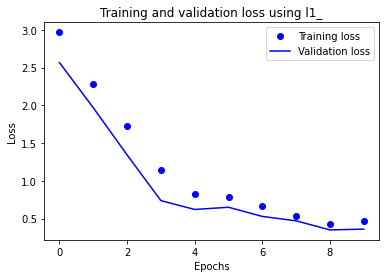

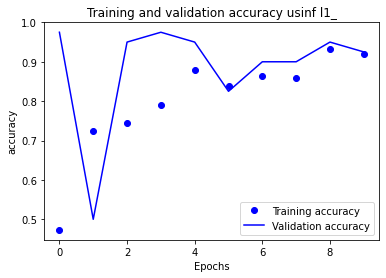

In [24]:
''' training loss and validation loss graph '''
train_loss = hist_dict3['loss']
val_loss = hist_dict3['val_loss']
plt.plot(l1_loss_values, 'bo', label='Training loss')
plt.plot(l1_val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss using l1_')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

''' training accuracy and validation accuracy graph '''
train_acc = hist_dict3['accuracy']
val_acc = hist_dict3['val_accuracy']
plt.plot(l1_acc_values, 'bo', label='Training accuracy')
plt.plot(l1_val_acc_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy usinf l1_')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [25]:
''' Model4''' 

''' container '''
model4 = Sequential()

''' Convolutional Layers '''
model4.add(Convolution2D(32, (3, 3),kernel_regularizer=regularizers.l2(0.001), input_shape = (200, 200, 1), activation = 'relu'))
model4.add(MaxPooling2D(pool_size = (2, 2)))

model4.add(Convolution2D(32, (3, 3), kernel_regularizer=regularizers.l2(0.001),activation = 'relu'))
model4.add(MaxPooling2D(pool_size = (2, 2)))

model4.add(Convolution2D(64, (3, 3), kernel_regularizer=regularizers.l2(0.001),activation = 'relu'))
model4.add(MaxPooling2D(pool_size = (2, 2)))

model4.add(Convolution2D(64, (3, 3), kernel_regularizer=regularizers.l2(0.001),activation = 'relu'))
model4.add(MaxPooling2D(pool_size = (2, 2)))

model4.add(Flatten())

''' Hidden Layer '''
model4.add(Dense(128, activation = 'relu'))

''' Classification Layer '''
model4.add(Dense(1, activation = 'sigmoid'))

In [26]:
''' compile the model '''
model4.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [27]:
''' training '''
history4 = model4.fit(training_set, epochs = 10, validation_data= test_set)

Epoch 1/10
15/15 [==============================] - 5s 362ms/step - loss: 0.8462 - accuracy: 0.4392 - val_loss: 0.7909 - val_accuracy: 0.5000
Epoch 2/10
15/15 [==============================] - 5s 330ms/step - loss: 0.7779 - accuracy: 0.5270 - val_loss: 0.7605 - val_accuracy: 0.5000
Epoch 3/10
15/15 [==============================] - 5s 312ms/step - loss: 0.7481 - accuracy: 0.5000 - val_loss: 0.7049 - val_accuracy: 0.5000
Epoch 4/10
15/15 [==============================] - 5s 352ms/step - loss: 0.6265 - accuracy: 0.7365 - val_loss: 0.2771 - val_accuracy: 0.9500
Epoch 5/10
15/15 [==============================] - 6s 377ms/step - loss: 0.4406 - accuracy: 0.8243 - val_loss: 0.1157 - val_accuracy: 0.9750
Epoch 6/10
15/15 [==============================] - 5s 345ms/step - loss: 0.4004 - accuracy: 0.8581 - val_loss: 0.1834 - val_accuracy: 0.9500
Epoch 7/10
15/15 [==============================] - 5s 336ms/step - loss: 0.3491 - accuracy: 0.8514 - val_loss: 0.1981 - val_accuracy: 0.9500
Epoch 

In [28]:
hist_dict4 = history4.history
hist_dict4.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

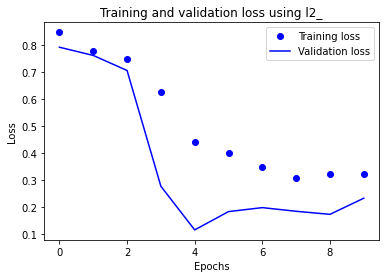

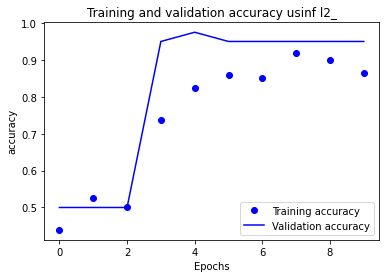

In [29]:
''' training loss and validation loss graph '''
train_los = hist_dict4['loss']
val_loss = hist_dict4['val_loss']
plt.plot(train_loss, 'bo', label='Training loss')
plt.plot(val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss using l2_')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

''' training accuracy and validation accuracy graph '''
train_acc = hist_dict4['accuracy']
test_acc = hist_dict4['val_accuracy']
plt.plot(train_acc, 'bo', label='Training accuracy')
plt.plot(val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy usinf l2_')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [30]:
''' Model 5'''

''' container '''
model5 = Sequential()

''' Convolutional Layers '''
model5.add(Convolution2D(32, (3, 3),kernel_regularizer=regularizers.l1_l2(0.001), input_shape = (200, 200, 1), activation = 'relu'))
model5.add(MaxPooling2D(pool_size = (2, 2)))

model5.add(Convolution2D(32, (3, 3),kernel_regularizer=regularizers.l1_l2(0.001), activation = 'relu'))
model5.add(MaxPooling2D(pool_size = (2, 2)))

model5.add(Convolution2D(64, (3, 3),kernel_regularizer=regularizers.l1_l2(0.001), activation = 'relu'))
model5.add(MaxPooling2D(pool_size = (2, 2)))

model5.add(Convolution2D(64, (3, 3),kernel_regularizer=regularizers.l1_l2(0.001), activation = 'relu'))
model5.add(MaxPooling2D(pool_size = (2, 2)))

model5.add(Flatten())

''' Hidden Layer '''
model5.add(Dense(128, activation = 'relu'))

''' Classification Layer '''
model5.add(Dense(1, activation = 'sigmoid'))

In [31]:
''' Compile the model '''
model5.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [32]:
''' history '''
history5 = model5.fit(training_set, epochs = 10, validation_data= test_set)

Epoch 1/10
15/15 [==============================] - 5s 359ms/step - loss: 3.9866 - accuracy: 0.5270 - val_loss: 3.2523 - val_accuracy: 0.5000
Epoch 2/10
15/15 [==============================] - 5s 350ms/step - loss: 2.7541 - accuracy: 0.6081 - val_loss: 2.2370 - val_accuracy: 0.8000
Epoch 3/10
15/15 [==============================] - 5s 341ms/step - loss: 1.8516 - accuracy: 0.7770 - val_loss: 1.4021 - val_accuracy: 0.7250
Epoch 4/10
15/15 [==============================] - 6s 367ms/step - loss: 1.1441 - accuracy: 0.8176 - val_loss: 0.7566 - val_accuracy: 0.9750
Epoch 5/10
15/15 [==============================] - 5s 333ms/step - loss: 0.6973 - accuracy: 0.9189 - val_loss: 0.4886 - val_accuracy: 0.9500
Epoch 6/10
15/15 [==============================] - 6s 382ms/step - loss: 0.5597 - accuracy: 0.8851 - val_loss: 0.5414 - val_accuracy: 0.9000
Epoch 7/10
15/15 [==============================] - 5s 343ms/step - loss: 0.4641 - accuracy: 0.9122 - val_loss: 0.3293 - val_accuracy: 0.9500
Epoch 

In [33]:
hist_dict5 = history5.history
hist_dict5.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

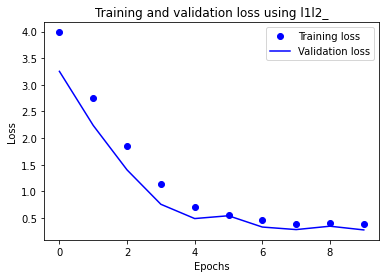

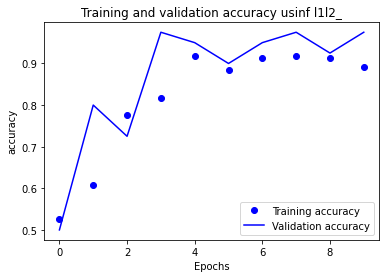

In [34]:
''' traininga loss and validation loss graph '''
train_loss = hist_dict5['loss']
val_loss = hist_dict5['val_loss']
plt.plot(train_loss, 'bo', label='Training loss')
plt.plot(val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss using l1l2_')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

''' traininga accuracy and validation accuracy graph '''
train_acc = history_dict5['accuracy']
val_acc = history_dict5['val_accuracy']
plt.plot(train_acc, 'bo', label='Training accuracy')
plt.plot(val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy usinf l1l2_')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()